# LASSO とは

データ行列と出力ベクトルをそれぞれ
\begin{align*}
    \mathbf{X} = \left( \begin{matrix}
        \mathbf{x}_1^T \\
        \mathbf{x}_2^T \\
        \vdots \\
        \mathbf{x}_n^T
        \end{matrix} \right)
        \in \mathbb{R}^{n \times p},
        \qquad
       \mathbf{y} = \left( \begin{matrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{matrix} \right) \in \mathbb{R}^n
\end{align*}
とおく。
ここで

- $ p $ : 説明変数の次元
- $ n $ : データ数
- $ \mathbf{x}_i $ :  $i$ 番目のデータ

LASSO では以下の式を最小化する重みベクトル $\beta_0 \in \mathbb{R}, \boldsymbol{\beta} \in \mathbb{R}^{p}$ を推定する。
\begin{align*}
    {\rm arg~min}_{\beta_0, \boldsymbol{\beta}}
    \cfrac{1}{2} \parallel \mathbf{y} - \beta_0\mathbf{1} - \mathbf{X} \boldsymbol{\beta} \parallel_2^2 + \lambda \parallel \boldsymbol{\beta} \parallel_1
\end{align*}

## 座標降下法

### $\beta_0 = 0$ の場合

\begin{align*}
    {\rm arg~min}_{\boldsymbol{\beta} \in \mathbb{R}^p}
    \cfrac{1}{2} \parallel \mathbf{y} - \mathbf{X} \boldsymbol{\beta} \parallel_2^2
    + \lambda \parallel \boldsymbol{\beta} \parallel_1
\end{align*}

座標降下法は他の係数はすでに更新したことを仮定し，重み $\beta_j$ に対して部分的に最適化を行う手法である。

\begin{align*}
    &\tilde{\beta}_j
    \leftarrow S (z_j,  \lambda)
    = \left\{
        \begin{matrix}
            z_j - \lambda   & (z_j>0 \& |z_j| > \lambda) \\
            z_j + \lambda  & (z_j<0 \& |z_j| > \lambda) \\
            0                 & (|z_j| \leq \lambda)
        \end{matrix}
        \right. \\
    &\mathbf{z} = \left( \begin{matrix} z_1 \\  z_2 \\ \vdots \\ z_p \end{matrix} \right)
    = \cfrac{1}{n} \mathbf{X} (\mathbf{y} - \tilde{\mathbf{y}}^{(j)})
\end{align*}
ここで、
\begin{align*}
    \tilde{y}^{(j)}_i = \sum_{k=1 (\neq j)}^p x_{ik} \tilde{\beta}_k ,
    \quad
    \tilde{\mathbf{y}}^{(j)}
    = \left( \begin{matrix} \tilde{y}^{(j)}_1 \\ \tilde{y}^{(j)}_2 \\ \vdots \\ \tilde{y}^{(j)}_n \end{matrix} \right) 
    = \left( \begin{matrix}
        \displaystyle \sum_{k=1(\neq j)}^p x_{1k} \tilde{\beta}_k \\
        \displaystyle \sum_{k=1(\neq j)}^p x_{2k} \tilde{\beta}_k \\
        \vdots \\
        \displaystyle \sum_{k=1(\neq j)}^p x_{nk} \tilde{\beta}_k
        \end{matrix} \right)
\end{align*}

#### 1次元の場合

\begin{align*}
    {\rm arg~min}_{\beta \in \mathbb{R}}
    = \cfrac{1}{2} \sum_{i=1}^n (y_i - x_i \beta_1)^2 + \lambda |\beta_1|
\end{align*}

\begin{align*}
    \cfrac{1}{2} \sum_{i=1}^n (y_i - x_i \beta_1)^2 + \lambda \beta_1 {\rm sgn\ }(\beta_1)
    =& \cfrac{1}{2} \sum_{i=1}^n x_i^2 \beta_1^2 - \left(\sum_{i=1}^n y_i x_i - \lambda{\rm sgn\ }(\beta_1) \right) \beta_1 + const. \\
    =& \cfrac{1}{2} \sum_{i=1}^n x_i^2 \left\{
            \beta_1 -
            \left(\sum_{i=1}^n y_i x_i - \lambda{\rm sgn\ }(\beta_1) \right) \left( \sum_{i=1}^n x_i^2 \right)^{-1}
        \right\}^2
        + const. \\
    =& \cfrac{1}{2} n\left\{
            \beta_1 -
            \cfrac{1}{n}\left( \sum_{i=1}^n y_i x_i - \lambda {\rm sgn\ }(\beta_1) \right)
        \right\}^2
        + const. 
\end{align*}
最後はデータを白色化 ($ \sum_i x_i = 0, \sum_i x_i^2 = n $) しているものとして計算。
\begin{align*}
    \hat{\beta}_1 = \left\{ \begin{matrix}
        \displaystyle \cfrac{1}{n} \left(\sum_{i=1}^n y_ix_i - \lambda\right) & \displaystyle \sum_{i=1}^n y_i x_i > \lambda \\
        \displaystyle \cfrac{1}{n} \left(\sum_{i=1}^n y_ix_i + \lambda\right) & \displaystyle \sum_{i=1}^n y_i x_i < -\lambda \\
        0                                           & \displaystyle - \lambda \leq \sum_{i=1}^n y_i x_i \leq \lambda
        \end{matrix} \right.
\end{align*}

[5.5450223]
[[1.99271076]]


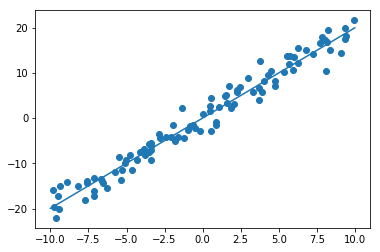

In [47]:
# 1次元


import numpy as np;
import matplotlib.pyplot as plt;

# 　generating data

b = 2.0;
s = 2.0;
x = np.random.rand (1,100) * 20.0 - 10.0;
y = b*x + s*np.random.randn (1, 100)

plt.scatter (x[0,:],y[0,:])


# whitening
m = np.mean (x,axis=1);
s = np.std (x, axis=1);
xw = (x-m)/s;

# estimating
_, n = x.shape
z = y.dot (xw.T) 
beta = 0.0;
lmd = 5.0;
if (z > lmd):
    beta = (z - lmd)/(n*s);
elif (z < -lmd):
    beta = (z + lmd)/(n*s);

xs = np.linspace (-10,10);
plt.plot (xs, (beta*xs).reshape (50,));

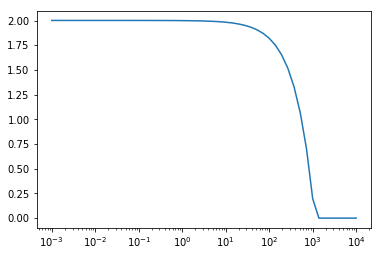

In [48]:
llmds = np.linspace (-3,4);
idx = 0;
betas = np.zeros_like (llmds);
for lmd in (10.0 ** llmds):
    if (z > lmd):
        betas[idx] = (z - lmd)/(n*s);
    elif (z < -lmd):
        betas[idx] = (z + lmd)/(n*s);
        
    idx += 1;
    
plt.plot ( (10.0 ** llmds), betas);
plt.xscale ('log')